In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
path_dataset2 = r"C:\Users\Milan Anand Raj\Downloads\CS661\cs661_evolution_of_music\dataset\albumlist.csv"
dataset = pd.read_csv(path_dataset2)

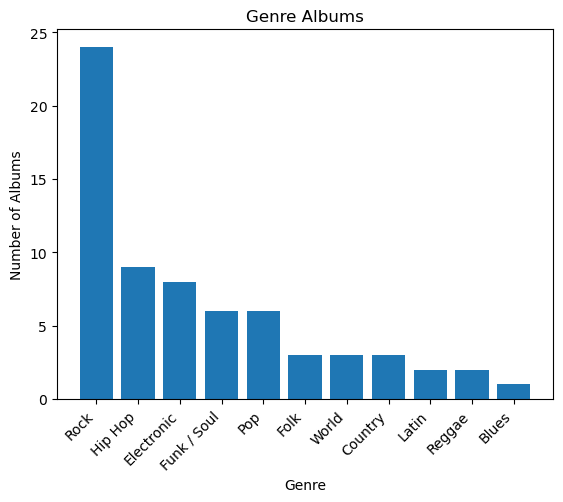

In [35]:
# initialize a dictionary to store the number of albums for each genre
# Take input for the decade
decade = input("Enter the decade (e.g., 1960s, 1970s, 1980s, 1990s, 2000s): ")

# Extract the start and end years from the input decade
start_year = int(decade[:4])
end_year = int(decade[:3] + "9")

# Filter the dataset based on the start and end years
filtered_dataset = dataset[(dataset['Year'] >= start_year) & (dataset['Year'] <= end_year)]

genre_albums = {}
counts = filtered_dataset['Genre'].value_counts()
for genres in counts.index:
    # split the genres string by ','
    count = counts[genres]
    genres = genres.strip()
    split_genres = genres.split(',')
    
    for genre in split_genres:
        genre = genre.strip(" & ")
        # if the genre is not in the dictionary, add it with the count
        if genre not in genre_albums:
            genre_albums[genre] = count
        # if the genre is already in the dictionary, add the count to the existing count
        else:
            genre_albums[genre]= genre_albums[genre] + count

# Sort the genre_albums dictionary by count in descending order
sorted_genre_albums = sorted(genre_albums.items(), key=lambda x: x[1], reverse=True)

# Extract the genres and counts from the sorted dictionary
genres = [genre for genre, count in sorted_genre_albums]
counts = [count for genre, count in sorted_genre_albums]

# Plot the histogram
plt.bar(range(len(genres)), counts)
plt.xlabel('Genre')
plt.ylabel('Number of Albums')
plt.title('Genre Albums')

# Set the x-axis labels to the genres
plt.xticks(range(len(genres)), genres, rotation=45, ha='right')

# Show the plot
plt.show()
